In [1]:
import jax
import jax.numpy as np
import matplotlib.pyplot as plt
from functools import partial
import numpy as np
import scipy as sp

In [2]:
# from jax import config
# config.update("jax_enable_x64", True)

## Constants

In [3]:
L = 1.
NX = NY = 512
X_START = 0.
X_END = L
Y_START = 0.
Y_END = L

## Space-Time Domain

In [4]:
x = np.linspace(X_START, X_END, NX + 1)
y = np.linspace(Y_START, Y_END, NY + 1)
X, Y = np.meshgrid(x, y)

In [5]:
dx = x[1] - x[0]
dy = y[1] - y[0]

In [6]:
a = 2./dx**2
b = 2./dy**2
c = -(a + b)

## Initial Conditions functions

In [7]:
u = (lambda x, y: np.sin(2.*np.pi*x) * np.sin(2.*np.pi*y) + (1./16.**2) * np.sin(32.*np.pi*x) * np.sin(32.*np.pi*y))
f = (lambda x, y: -8 * np.pi**2 * np.sin(2*np.pi*x) * np.sin(2*np.pi*y) - 8 * np.pi**2 * np.sin(32.*np.pi*x) * np.sin(32.*np.pi*y))

## Checking ()

In [8]:
# d2udx2 = jax.vmap(jax.vmap(jax.grad(jax.grad(u, 0), 0), in_axes=(0, None)), in_axes=(None, 0))(x, y)
# d2udy2 = jax.vmap(jax.vmap(jax.grad(jax.grad(u, 1), 1), in_axes=(0, None)), in_axes=(None, 0))(x, y)
# np.all(d2udx2 + d2udy2 - f(X, Y) < 1e-4)

## Initial Conditons

In [9]:
U = u(X, Y)
F = f(X, Y)

In [ ]:
np.save("F_numpy", F)

In [10]:
m_arr = np.empty(NX)
for i in range(int(NX/2)):
    m_arr[i] = i
    m_arr[i + int(NX/2)] = i - int(NX/2)
n_arr = m_arr

In [11]:
u_tilda_den = lambda m, n: (a*np.cos(2.*np.pi*m/NX) + b*np.cos(2.*np.pi*n/NY) + c + np.finfo(float).eps)
den = np.empty((NX, NY))
for i, m_val in enumerate(m_arr):
    for j, n_val in enumerate(n_arr):
        den[i, j] = u_tilda_den(m_val,n_val)

## Direct Solver

In [12]:
def poisson_fft_direct_solver(F, den):
    F_tilda = sp.fft.fft2(F[:-1, :-1].astype(complex))        
    U_tilda = F_tilda/ den
    return np.real(sp.fft.ifft2(U_tilda))

In [13]:
U_numerical = poisson_fft_direct_solver(F, den)

In [14]:
U_final = np.zeros_like(U)
U_final[:-1, :-1] = U_numerical
U_final[-1,:-1] = U_numerical[0, :]
U_final[:-1,-1] = U_numerical[:, 0]

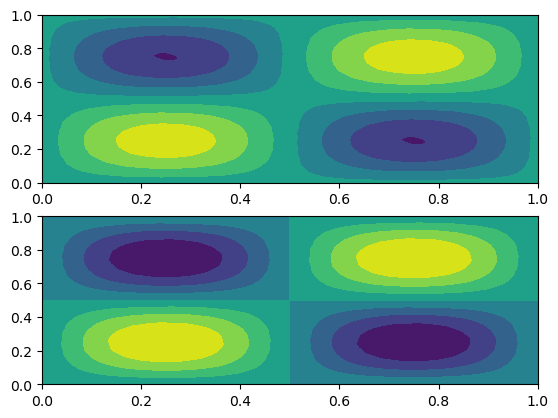

In [15]:
fig, axs = plt.subplots(2)
axs[0].contourf(X, Y, U_final)
axs[1].contourf(X, Y, U)